In [319]:
# Importing Basic packages

import pandas as pd
import numpy as np
from collections import Counter
import scipy as sp
from scipy import stats

In [320]:
# Reading files
df = pd.read_csv('features.csv')
pd.set_option('display.max_columns',50)
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

### EDA on datset

In [321]:
# checking null values
df.isnull().sum()/len(df)

respondent_id                  0.000000
h1n1_concern                   0.003445
h1n1_knowledge                 0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
health_insurance               0.459580
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
opinion_h1n1_sick_from_vacc    0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000


### Pandas Profiling

In [322]:
from pandas_profiling import ProfileReport


In [323]:
df.profile_report()


Summarize dataset:   0%|          | 0/49 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Filling Categorical NaN values

In [324]:
Counter(df.marital_status)

Counter({'Not Married': 11744, 'Married': 13555, nan: 1408})

<AxesSubplot:xlabel='marital_status'>

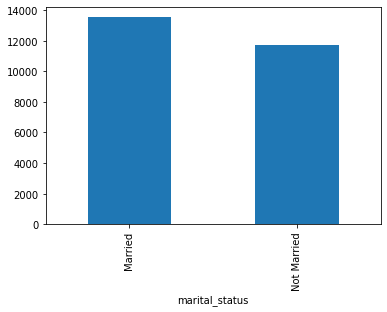

In [325]:
df.groupby(['marital_status'])['marital_status'].count().sort_values(ascending=False).plot.bar()

In [326]:
df['marital_status'].value_counts().index[0]

'Married'

In [327]:
Counter(df.rent_or_own)

Counter({'Own': 18736, 'Rent': 5929, nan: 2042})

<AxesSubplot:xlabel='rent_or_own'>

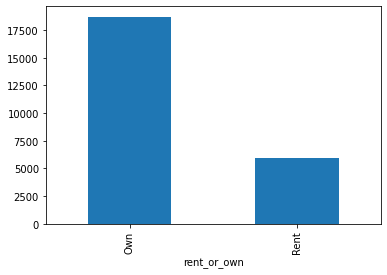

In [328]:
df.groupby(['rent_or_own'])['rent_or_own'].count().sort_values(ascending=False).plot.bar()

In [329]:
df['rent_or_own'].value_counts().index[0]

'Own'

In [330]:
Counter(df.employment_status)

Counter({'Not in Labor Force': 10231,
         'Employed': 13560,
         'Unemployed': 1453,
         nan: 1463})

<AxesSubplot:xlabel='employment_status'>

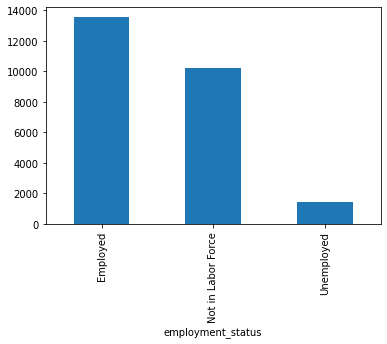

In [331]:
df.groupby(['employment_status']).employment_status.count().sort_values(ascending=False).plot.bar()

In [332]:
df['employment_status'].value_counts().index[0]

'Employed'

In [333]:
Counter(df.education)

Counter({'< 12 Years': 2363,
         '12 Years': 5797,
         'College Graduate': 10097,
         'Some College': 7043,
         nan: 1407})

<AxesSubplot:xlabel='education'>

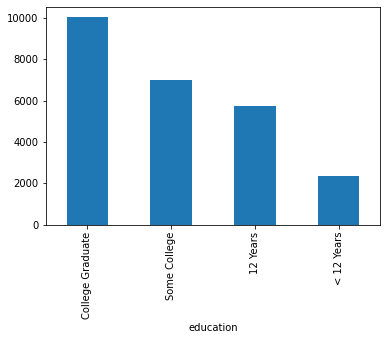

In [334]:
df.groupby('education').employment_status.count().sort_values(ascending=False).plot.bar()

In [335]:
df['education'].value_counts().index[0]

'College Graduate'

In [336]:
Counter(df.income_poverty)

Counter({'Below Poverty': 2697,
         '<= $75,000, Above Poverty': 12777,
         '> $75,000': 6810,
         nan: 4423})

<AxesSubplot:xlabel='income_poverty'>

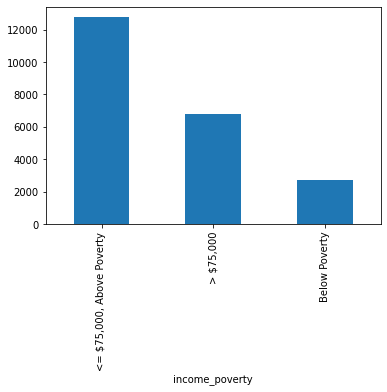

In [337]:
df.groupby('income_poverty').income_poverty.count().sort_values(ascending=False).plot.bar()

In [338]:
df.income_poverty.value_counts().index[0]

'<= $75,000, Above Poverty'

In [339]:
def impute_nan(dataset,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [340]:
for feature in ['marital_status','rent_or_own','employment_status','education','income_poverty']:
    impute_nan(df,feature)

In [341]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

### Filling Numerical nan values

In [342]:
mode1 = df.h1n1_concern.mode()
mode1

0    2.0
dtype: float64

In [343]:
# To replace it with mode


df['h1n1_concern'].fillna(df.h1n1_concern.mode()[0], inplace=True)


In [344]:
Counter(df.h1n1_knowledge.unique())

Counter({0.0: 1, 2.0: 1, 1.0: 1, nan: 1})

In [345]:
mode2 = df.h1n1_knowledge.mode()
mode2

0    1.0
dtype: float64

In [346]:
df.h1n1_knowledge.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

In [347]:
df['h1n1_knowledge'].fillna(df.h1n1_concern.mode()[0], inplace=True)


In [348]:
df.behavioral_antiviral_meds.value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

In [349]:
mode3 = df.behavioral_antiviral_meds.mode()
mode3

0    0.0
dtype: float64

In [350]:
df['behavioral_antiviral_meds'].fillna(df.h1n1_concern.mode()[0], inplace=True)


In [351]:
df.behavioral_avoidance.value_counts()            

1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

In [352]:
mode4 = df.behavioral_avoidance.mode()         
mode4

0    1.0
dtype: float64

In [353]:
df['behavioral_avoidance'].fillna(df.h1n1_concern.mode()[0], inplace=True)


In [354]:
df.behavioral_face_mask.value_counts()

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

In [355]:
mode5 = df.behavioral_face_mask.mode()
mode5

0    0.0
dtype: float64

In [356]:
df['behavioral_face_mask'].fillna(df.behavioral_face_mask.mode()[0],inplace=True)

In [357]:
df.behavioral_wash_hands.value_counts()

1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

In [358]:
mode6 = df.behavioral_wash_hands.mode()
mode6

0    1.0
dtype: float64

In [359]:
df['behavioral_wash_hands'].fillna(df.behavioral_wash_hands.mode()[0],inplace=True)

In [360]:
df.behavioral_large_gatherings.value_counts()

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

In [361]:
mode7 = df.behavioral_large_gatherings.mode()
mode7

0    0.0
dtype: float64

In [362]:
df['behavioral_large_gatherings'].fillna(df.behavioral_large_gatherings.mode()[0],inplace=True)

In [363]:
df.behavioral_outside_home.value_counts()

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

In [364]:
mode8 = df.behavioral_outside_home.mode()
mode8


0    0.0
dtype: float64

In [365]:
df['behavioral_outside_home'].fillna(df.behavioral_outside_home.mode()[0],inplace=True)

In [366]:
df.behavioral_touch_face.value_counts()

1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

In [367]:
mode9 = df.behavioral_touch_face.mode()
mode9


0    1.0
dtype: float64

In [368]:
df['behavioral_touch_face'].fillna(df.behavioral_touch_face.mode()[0],inplace=True)

In [369]:
df.doctor_recc_h1n1.value_counts()

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

In [370]:
mode10 = df.doctor_recc_h1n1.mode()
mode10


0    0.0
dtype: float64

In [371]:
df['doctor_recc_h1n1'].fillna(df.doctor_recc_h1n1.mode()[0],inplace=True)

In [372]:
df.doctor_recc_seasonal.value_counts()

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

In [373]:
mode11 = df.doctor_recc_seasonal.mode()
mode11

0    0.0
dtype: float64

In [374]:
df['doctor_recc_seasonal'].fillna(df.doctor_recc_seasonal.mode()[0],inplace=True)

In [375]:
df.chronic_med_condition.value_counts()

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

In [376]:
mode12 = df.chronic_med_condition.mode()
mode12

0    0.0
dtype: float64

In [377]:
df['chronic_med_condition'].fillna(df.chronic_med_condition.mode()[0],inplace=True)

In [378]:
df.child_under_6_months.value_counts()

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

In [379]:
mode13 = df.child_under_6_months.mode()
mode13

0    0.0
dtype: float64

In [380]:
df['child_under_6_months'].fillna(df.child_under_6_months.mode()[0],inplace=True)

In [381]:
df.health_worker.value_counts()

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

In [382]:
mode14 = df.health_worker.mode()
mode14

0    0.0
dtype: float64

In [383]:
df['health_worker'].fillna(df.health_worker.mode()[0],inplace=True)

In [384]:
df.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [385]:
mode15 = df.health_insurance.mode()
mode15


0    1.0
dtype: float64

In [386]:
df['health_insurance'].fillna(df.health_insurance.mode()[0],inplace=True)

In [387]:
df.opinion_h1n1_vacc_effective.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64

In [388]:
mode16 = df.opinion_h1n1_vacc_effective.mode()
mode16

0    4.0
dtype: float64

In [389]:
df['opinion_h1n1_vacc_effective'].fillna(df.opinion_h1n1_vacc_effective.mode()[0],inplace=True)

In [390]:
df.opinion_h1n1_risk.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opinion_h1n1_risk, dtype: int64

In [391]:
mode17 = df.opinion_h1n1_risk.mode()
mode17

0    2.0
dtype: float64

In [392]:
df['opinion_h1n1_risk'].fillna(df.opinion_h1n1_risk.mode()[0],inplace=True)

In [393]:
df.opinion_h1n1_sick_from_vacc.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

In [394]:
mode18 = df.opinion_h1n1_sick_from_vacc.mode()
mode18

0    2.0
dtype: float64

In [395]:
df['opinion_h1n1_sick_from_vacc'].fillna(df.opinion_h1n1_sick_from_vacc.mode()[0],inplace=True)

In [396]:
df.opinion_seas_vacc_effective.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

In [397]:
mode19 = df.opinion_seas_vacc_effective.mode()
mode19

0    4.0
dtype: float64

In [398]:
df['opinion_seas_vacc_effective'].fillna(df.opinion_seas_vacc_effective.mode()[0],inplace=True)

In [399]:
df.opinion_seas_risk.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opinion_seas_risk, dtype: int64

In [400]:
mode20 = df.opinion_seas_risk.mode()
mode20

0    2.0
dtype: float64

In [401]:
df['opinion_seas_risk'].fillna(df.opinion_seas_risk.mode()[0],inplace=True)

In [402]:
df.opinion_seas_sick_from_vacc.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

In [403]:
mode21 = df.opinion_seas_sick_from_vacc.mode()
mode21

0    1.0
dtype: float64

In [404]:
df['opinion_seas_sick_from_vacc'].fillna(df.opinion_seas_sick_from_vacc.mode()[0],inplace=True)

In [405]:
df.household_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

In [406]:
mode22 = df.household_adults.mode()
mode22

0    1.0
dtype: float64

In [407]:
df['household_adults'].fillna(df.household_adults.mode()[0],inplace=True)

In [408]:
df.household_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

In [409]:
mode23 = df.household_children.mode()
mode23

0    0.0
dtype: float64

In [410]:
df['household_children'].fillna(df.household_children.mode()[0],inplace=True)

In [411]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

In [412]:
df = df.drop(['employment_industry','employment_occupation'],axis=1)
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               1.0                          3.0                1.0   
3               1.0                          3.0                3.0   
4               1.0                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

### Output Features

In [413]:
df1 = pd.read_csv('labels.csv')
df1.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [414]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [415]:
df1.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

### Merging the csv files

In [416]:
# using merge function by setting how='outer'
output = pd.merge(df, df1, 
                   on='respondent_id', 
                   how='outer')

In [417]:
output.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               1.0                          3.0                1.0   
3               1.0                          3.0                3.0   
4               1.0                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [418]:
output.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [419]:
# X is the input column and y is output column


X = output.iloc[:,:-2]
y = output['h1n1_vaccine']
y1 = output['seasonal_vaccine']


In [420]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

### onehot encoding

In [421]:


X = pd.get_dummies(output,columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'])

In [422]:
pd.set_option('display.max_columns',100)

X

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                        1.0               0.0                   0.0   
1                        1.0               0.0                   0.0   
2                        0.0               0.0                   0.0   
3                        0.0               0.0                   1.0   
4                        1.0               0.0                   0.0   
...                      ...               ...                   ...   
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    1.0               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702           

In [423]:
## Dropping features to avoid dummy variable trap in onehot encoding

X.drop(['age_group_18 - 34 Years','education_12 Years','race_Black','sex_Female','income_poverty_<= $75,000, Above Poverty','marital_status_Married','rent_or_own_Own','employment_status_Employed','hhs_geo_region_atmpeygn','census_msa_Non-MSA'], axis = 1,inplace = True)                                 

In [424]:
X

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                        1.0               0.0                   0.0   
1                        1.0               0.0                   0.0   
2                        0.0               0.0                   0.0   
3                        0.0               0.0                   1.0   
4                        1.0               0.0                   0.0   
...                      ...               ...                   ...   
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    1.0               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702           

## KNN

In [425]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### For h1n1_vaccine

In [426]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1 ,random_state=42)  

In [427]:
# Define the Model

model1 = KNeighborsClassifier(n_neighbors=5)
model1

KNeighborsClassifier()

In [428]:
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)
accuracy_score(y_test,y_predict)

0.7645076750280794

In [429]:
pd.crosstab(y_test,y_predict)

col_0            0    1
h1n1_vaccine           
0             1988  111
1              518   54

In [430]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2099
           1       0.33      0.09      0.15       572

    accuracy                           0.76      2671
   macro avg       0.56      0.52      0.50      2671
weighted avg       0.69      0.76      0.71      2671



### SMOTE

In [431]:
# Importing SMOTE package

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [519]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) #.astype('float')



In [520]:
model1.fit(X_train_smote,y_train_smote)
y_predict = model1.predict(X_test)
accuracy_score(y_test,y_predict)

0.5907899663047548

#### For seasonal_vaccine

In [432]:
# Train Test Split

X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.1 ,random_state=42)  

In [433]:
# Define the Model

model1 = KNeighborsClassifier(n_neighbors=5)
model1

KNeighborsClassifier()

In [434]:
model1.fit(X_train,y1_train)
y1_predict = model1.predict(X_test)
accuracy_score(y1_test,y1_predict)


0.566828903032572

In [435]:
pd.crosstab(y1_test,y1_predict)

col_0               0    1
seasonal_vaccine          
0                 880  565
1                 592  634

In [436]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      1445
           1       0.53      0.52      0.52      1226

    accuracy                           0.57      2671
   macro avg       0.56      0.56      0.56      2671
weighted avg       0.57      0.57      0.57      2671



### SMOTE

In [521]:
# Importing SMOTE package

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [522]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y1_train_smote = smote.fit_resample(X_train.astype('float'),y1_train) #.astype('float')



In [523]:
model1.fit(X_train_smote,y1_train_smote)
y1_predict = model1.predict(X_test)
accuracy_score(y1_test,y1_predict)

0.5724447772369899

## SVM

In [437]:
from sklearn.svm import SVC


#### For h1n1_vaccine

In [438]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [439]:
# Define the Model
model2 = SVC(C=100,gamma=0.2)
model2

SVC(C=100, gamma=0.2)

In [440]:
model2.fit(X_train,y_train)
y_predict = model2.predict(X_test)
accuracy_score(y_test,y_predict)

0.7862223886184949

In [441]:
pd.crosstab(y_test,y_predict)

col_0            0
h1n1_vaccine      
0             2100
1              571

In [442]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2100
           1       0.00      0.00      0.00       571

    accuracy                           0.79      2671
   macro avg       0.39      0.50      0.44      2671
weighted avg       0.62      0.79      0.69      2671



c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### SMOTE

In [524]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) #.astype('float')



In [525]:
model2.fit(X_train_smote,y_train_smote)
y_predict = model2.predict(X_test)
accuracy_score(y_test,y_predict)

0.7862223886184949

#### For seasonal_vaccine

In [443]:
# Train Test Split

X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.1 ,random_state=10)  

In [444]:
# Define the Model
model2 = SVC(C=100,gamma=0.2)
model2

SVC(C=100, gamma=0.2)

In [445]:
model2.fit(X_train,y1_train)
y1_predict = model2.predict(X_test)
accuracy_score(y1_test,y1_predict)

0.5406214900786223

In [446]:
pd.crosstab(y1_test,y1_predict)

col_0                0   1
seasonal_vaccine          
0                 1421  10
1                 1217  23

In [447]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1431
           1       0.70      0.02      0.04      1240

    accuracy                           0.54      2671
   macro avg       0.62      0.51      0.37      2671
weighted avg       0.61      0.54      0.39      2671



### SMOTE

In [526]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y1_train_smote = smote.fit_resample(X_train.astype('float'),y1_train) #.astype('float')



In [527]:
model2.fit(X_train_smote,y1_train_smote)
y1_predict = model2.predict(X_test)
accuracy_score(y1_test,y1_predict)

0.5417446649195058

## Decision Tree

In [448]:
from sklearn.tree import DecisionTreeClassifier


#### For h1n1_vaccine

In [449]:
#  Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=10)

In [450]:
# Model selection

model3 = DecisionTreeClassifier(max_depth=4)
model3

DecisionTreeClassifier(max_depth=4)

In [451]:
# Training
model3.fit(X_train,y_train)
y_predict = model3.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

In [452]:
X

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                        1.0               0.0                   0.0   
1                        1.0               0.0                   0.0   
2                        0.0               0.0                   0.0   
3                        0.0               0.0                   1.0   
4                        1.0               0.0                   0.0   
...                      ...               ...                   ...   
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    1.0               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702           

#### Data imbalance in h1n1_vaccine

In [453]:
y.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [454]:
y1.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [455]:
# For unseen values/new values prediction
model3.predict([[0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0]]) 

array([0], dtype=int64)

In [456]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00       571

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



In [457]:
confusion_matrix(y_test,y_predict)

array([[2100,    0],
       [   0,  571]], dtype=int64)

### SMOTE

In [458]:
# Importing SMOTE package

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [459]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) #.astype('float')



In [460]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 18933, 1: 5103})
SMOTE Classes Counter({0: 18933, 1: 18933})


In [461]:
model3.fit(X_train_smote,y_train_smote)
y_predict = model3.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

In [462]:
confusion_matrix(y_test,y_predict)

array([[2100,    0],
       [   0,  571]], dtype=int64)

In [463]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00       571

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



In [513]:
# For unseen values/new values prediction
model3.predict([[0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0]]) 

array([0], dtype=int64)

#### For seasonal_vaccine

In [464]:
#  Train Test Split

X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.10,random_state=10)

In [465]:
# Model selection

model3 = DecisionTreeClassifier(max_depth=4)
model3

DecisionTreeClassifier(max_depth=4)

In [466]:
# Training
model3.fit(X_train,y1_train)
y1_predict = model3.predict(X_test)
accuracy_score(y1_test,y1_predict)

1.0

In [467]:
y1

0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

In [518]:
# For unseen values/new values prediction
model3.predict([[1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0]]) 

array([1], dtype=int64)

In [469]:
pd.crosstab(y1_test,y1_predict)

col_0                0     1
seasonal_vaccine            
0                 1431     0
1                    0  1240

In [470]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1431
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



### SMOTE

In [471]:
# Importing SMOTE package

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [472]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y1_train_smote = smote.fit_resample(X_train.astype('float'),y1_train) #.astype('float')



In [473]:
from collections import Counter
print("Actual Classes",Counter(y1_train))
print("SMOTE Classes",Counter(y1_train_smote))

Actual Classes Counter({0: 12841, 1: 11195})
SMOTE Classes Counter({1: 12841, 0: 12841})


In [474]:
model3.fit(X_train_smote,y1_train_smote)
y1_predict = model3.predict(X_test)
accuracy_score(y1_test,y1_predict)

1.0

In [516]:
# For unseen values/new values prediction
model3.predict([[0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0]]) 

array([0], dtype=int64)

### Random Forest

In [475]:
from sklearn.ensemble import RandomForestClassifier


#### For h1n1_vaccine

In [476]:
#  Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=10)

In [477]:
# Define the Model

model4 = RandomForestClassifier(n_estimators=50,random_state=100)
model4

RandomForestClassifier(n_estimators=50, random_state=100)

In [478]:
model4.fit(X_train,y_train)
y_predict = model4.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

In [479]:
confusion_matrix(y_test,y_predict)

array([[2100,    0],
       [   0,  571]], dtype=int64)

In [480]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00       571

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



### SMOTE

In [528]:
# Importing SMOTE package

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [529]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) #.astype('float')



In [530]:
model4.fit(X_train_smote,y_train_smote)
y_predict = model4.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

#### For seasonal_vaccine

In [481]:
#  Train Test Split

X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.10,random_state=10)

In [482]:
# Define the Model

model4 = RandomForestClassifier(n_estimators=50,random_state=100)
model4

RandomForestClassifier(n_estimators=50, random_state=100)

In [483]:
model4.fit(X_train,y1_train)
y1_predict = model4.predict(X_test)
accuracy_score(y1_test,y1_predict)

1.0

In [484]:
pd.crosstab(y1_test,y1_predict)

col_0                0     1
seasonal_vaccine            
0                 1431     0
1                    0  1240

In [485]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1431
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



### SMOTE

In [486]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y1_train_smote = smote.fit_resample(X_train.astype('float'),y1_train) #.astype('float')



In [487]:
from collections import Counter
print("Actual Classes",Counter(y1_train))
print("SMOTE Classes",Counter(y1_train_smote))

Actual Classes Counter({0: 12841, 1: 11195})
SMOTE Classes Counter({1: 12841, 0: 12841})


In [488]:
model4.fit(X_train_smote,y1_train_smote)
y1_predict = model4.predict(X_test)
accuracy_score(y1_test,y1_predict)

1.0

### XGBoost

In [489]:
from xgboost import XGBClassifier



#### For h1n1_vaccine

In [490]:
#  Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=10)

In [491]:
model5 = XGBClassifier(learning_rate = 1,max_depth = 6)
model5

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [492]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [493]:
model5.fit(X_train,y_train)
y_predict = model5.predict(X_test)
accuracy_score(y_test,y_predict)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1.0

In [494]:
confusion_matrix(y_test,y_predict)

array([[2100,    0],
       [   0,  571]], dtype=int64)

In [495]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00       571

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



### SMOTE

In [535]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) #.astype('float')



In [536]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [537]:
model5.fit(X_train_smote,y_train_smote)
y_predict = model5.predict(X_test)
accuracy_score(y_test,y_predict)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1.0

#### For seasonal_vaccine

In [496]:
#  Train Test Split

X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.10,random_state=10)

In [497]:
model5 = XGBClassifier(learning_rate = 1,max_depth = 6)
model5

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [498]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [499]:
model5.fit(X_train,y1_train)
y1_predict = model5.predict(X_test)
accuracy_score(y1_test,y1_predict)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1.0

In [500]:
pd.crosstab(y1_test,y1_predict)

col_0                0     1
seasonal_vaccine            
0                 1431     0
1                    0  1240

In [501]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1431
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



### SMOTE

In [538]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y1_train_smote = smote.fit_resample(X_train.astype('float'),y1_train) #.astype('float')



In [539]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [540]:
model5.fit(X_train_smote,y1_train_smote)
y1_predict = model5.predict(X_test)
accuracy_score(y1_test,y1_predict)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1.0

## ANN

In [547]:
from sklearn.neural_network import MLPClassifier


#### For h1n1_vaccine

In [548]:
#  Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=10)

In [549]:
model6 = MLPClassifier(hidden_layer_sizes=(50,50,50),random_state=10) #Layers will always be given number plus 2
model6

MLPClassifier(hidden_layer_sizes=(50, 50, 50), random_state=10)

In [564]:
model6.fit(X_train,y_train)
y_predict = model6.predict(X_test)
accuracy_score(y_test,y_predict)

0.7892175215275178

In [565]:
pd.crosstab(y_test,y_predict)

col_0            0  1
h1n1_vaccine         
0             2100  0
1              563  8

In [551]:
confusion_matrix(y_test,y_predict)

array([[2100,    0],
       [ 563,    8]], dtype=int64)

In [552]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2100
           1       1.00      0.01      0.03       571

    accuracy                           0.79      2671
   macro avg       0.89      0.51      0.45      2671
weighted avg       0.83      0.79      0.70      2671



### SMOTE

In [553]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train) #.astype('float')



In [554]:
model6.fit(X_train_smote,y_train_smote)
y_predict = model6.predict(X_test)
accuracy_score(y_test,y_predict)

0.9782852864095845

In [560]:
confusion_matrix(y_test,y_predict)

array([[2046,   54],
       [   4,  567]], dtype=int64)

In [562]:
pd.crosstab(y_test,y_predict)

col_0            0    1
h1n1_vaccine           
0             2046   54
1                4  567

In [561]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2100
           1       0.91      0.99      0.95       571

    accuracy                           0.98      2671
   macro avg       0.96      0.98      0.97      2671
weighted avg       0.98      0.98      0.98      2671



#### For seasonal_vaccine

In [555]:
#  Train Test Split

X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.10,random_state=10)

In [556]:
model6 = MLPClassifier(hidden_layer_sizes=(50,50,50),random_state=10) #Layers will always be given number plus 2
model6

MLPClassifier(hidden_layer_sizes=(50, 50, 50), random_state=10)

In [557]:
model6.fit(X_train,y1_train)
y1_predict = model6.predict(X_test)
accuracy_score(y1_test,y1_predict)

0.9996256083863722

In [558]:
pd.crosstab(y1_test,y1_predict)

col_0                0     1
seasonal_vaccine            
0                 1431     0
1                    1  1239

In [559]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1431
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



### SMOTE

In [543]:
# fit_sample was renamed to fit_resample in v0.4 and above of imblearn

X_train_smote,y1_train_smote = smote.fit_resample(X_train.astype('float'),y1_train) #.astype('float')



In [544]:
model6.fit(X_train_smote,y1_train_smote)
y1_predict = model6.predict(X_test)
accuracy_score(y1_test,y1_predict)

0.9640584050917259